In [32]:
import json
import numpy as np
import pandas as pd

In [33]:
path = "2023_05_08_11:49:27/result_0.json"

with open('../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [34]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for front in parsed_json[elem][generation]:
                    for individual in parsed_json[elem][generation][front]:
                        dictionary = {}
                        dictionary = {
                            'generation': generation,
                            'front': front,
                            'melody': individual['melody'],
                        }
                        for criterion in metaParameters_df['criteria'].values[0]:
                            dictionary[criterion] = individual['fitness'][criterion]
                        data.append(dictionary)
data_df = pd.DataFrame(data)

In [35]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_100,front_2,72/0.0625 72/0.375 67/0.0625 55/0.3125 63/0.06...,100.0,-80.0
1,generation_100,front_2,55/0.625 62/0.0625 62/0.0625 70/0.125 58/0.062...,-120.0,70.0
2,generation_100,front_2,83/0.875 65/0.0625 67/0.0625 72/0.3125 55/0.5 ...,70.0,25.0
3,generation_100,front_2,55/0.75 59/0.125 66/0.0625 R/0.0625 71/0.5625 ...,-60.0,45.0
4,generation_100,front_3,-1/0.875 79/0.0625 68/0.0625 55/0.8125 74/0.06...,90.0,-205.0


In [36]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria
0,NSGA-II,1000,4,16,f1,C,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.5,,,100,"[STABILITY, TENSION]"


In [37]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_100,front_2,72/0.0625 72/0.375 67/0.0625 55/0.3125 63/0.06...,100.0,-80.0
1,generation_100,front_2,55/0.625 62/0.0625 62/0.0625 70/0.125 58/0.062...,-120.0,70.0
2,generation_100,front_2,83/0.875 65/0.0625 67/0.0625 72/0.3125 55/0.5 ...,70.0,25.0
3,generation_100,front_2,55/0.75 59/0.125 66/0.0625 R/0.0625 71/0.5625 ...,-60.0,45.0
4,generation_100,front_3,-1/0.875 79/0.0625 68/0.0625 55/0.8125 74/0.06...,90.0,-205.0


In [38]:
data_df.loc[0]

generation                                       generation_100
front                                                   front_2
melody        72/0.0625 72/0.375 67/0.0625 55/0.3125 63/0.06...
STABILITY                                                 100.0
TENSION                                                   -80.0
Name: 0, dtype: object

In [39]:
generation = data_df[data_df["generation"] == "1000"].sort_values(by=['front'])

In [40]:
list_of_fronts = []
for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]


    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for individual in front_data[criterion]:
            front_temp.append(individual)
        front_elements.append(front_temp)
    list_of_fronts.append(front_elements)


In [41]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


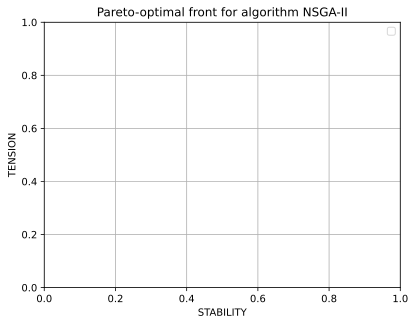

In [42]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y) in enumerate(list_of_fronts):
    ax.scatter(x, y, label = f"front {i+1}")

plt.legend()
plt.show()


In [43]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name].sort_values(by=['front'])
    print(generation_name)
    for front in generation["front"].unique():
        front_elements = []
        front_data = generation[generation["front"] == front]

        for criterion in metaParameters_df['criteria'].values[0]:
            front_temp = []
            for individual in front_data[criterion]:
                front_temp.append(individual)
            front_elements.append(front_temp)
        list_of_fronts.append(front_elements)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem[0]):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp

print(average_generations)



generation_0
generation_1
generation_11
generation_21
generation_31
generation_41
generation_51
generation_61
generation_71
generation_81
generation_91
generation_100
[[-110.           75.        ]
 [ -36.            4.        ]
 [ -36.            4.        ]
 [ -36.            4.        ]
 [ -36.            4.        ]
 [ -16.66666667  -15.        ]
 [ -13.33333333  -10.83333333]
 [   2.5          70.        ]
 [   2.5          70.        ]
 [   2.5          70.        ]
 [   2.5          70.        ]
 [   2.5          70.        ]]


[ 75.           4.           4.           4.           4.
 -15.         -10.83333333  70.          70.          70.
  70.          70.        ]


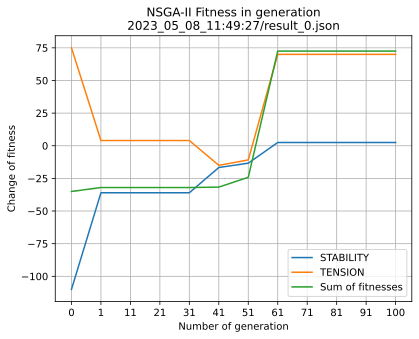

In [44]:
print(average_generations[:,i])

X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots()
ax.set_title("NSGA-II Fitness in generation\n" + path)
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xlabel("Number of generation")
ax.set_ylabel("Change of fitness")

ax.grid()

plt.legend()
plt.show()